In [918]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import math
import matplotlib.pyplot as plt,seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as ply
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
import plotly.io as pio


In [919]:
new_credit=pd.read_csv('application_data.csv')

In [920]:
prev_credit=pd.read_csv('previous_application.csv')

In [921]:
#Inspecting new credit data set

In [922]:
new_credit.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [923]:
new_credit.shape

(307511, 122)

In [924]:
new_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [925]:
new_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [926]:
new_credit.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Inspecting prev data set

In [927]:
prev_credit.tail(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670212,2785582,400317,Cash loans,18821.52,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.30,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [928]:
prev_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [929]:
prev_credit.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [930]:
new_credit.shape

(307511, 122)

In [931]:
prev_credit.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [932]:
prev_credit.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [933]:
prev_credit.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Checking for missing values New APP data

In [934]:
new_credit.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [935]:
#Finding percentage of missing values and rounding up to 2
round((new_credit.isnull().sum()/new_credit.shape[0])*100,2).sort_values(ascending=False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [936]:
#prev data before 45 % cleaning
new_credit.shape

(307511, 122)

In [937]:
#after removing columns which have more than 45 % missing values
new_credit=new_credit.loc[:,new_credit.isnull().mean()<=0.45]

In [938]:
new_credit.shape

(307511, 73)

In [939]:
new_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [940]:
#Checking percentage now
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
                               ...  
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
Length: 73, dtype: float64

In [941]:
#occupation has maximum null values
#Checking for occupation type
new_credit['OCCUPATION_TYPE'].unique()
#We have to treat this columns null values

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [942]:
new_credit['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [943]:
#Replacing null values with unknown with occupation type
new_credit['OCCUPATION_TYPE'].replace(np.NAN,"Unknown",inplace=True)

In [944]:
new_credit['OCCUPATION_TYPE'].isnull().sum()

0

In [945]:
new_credit['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [946]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
                              ...  
FLAG_PHONE                     0.00
FLAG_CONT_MOBILE               0.00
FLAG_WORK_PHONE                0.00
FLAG_EMP_PHONE                 0.00
REG_CITY_NOT_LIVE_CITY         0.00
Length: 73, dtype: float64

In [947]:
new_credit

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [948]:
col=[]
for i in new_credit.columns:
    if 'FLAG' in i:
        col.append(i)

In [949]:
#Dropping columns which are not required

In [950]:
col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [951]:
col=col[8:] #Not required columns

In [952]:
col

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [953]:
new_credit.drop(labels=col,axis=1,inplace=True)

In [954]:
new_credit.shape

(307511, 53)

In [955]:
col2=[]
for i in new_credit.columns:
    if 'AMT_REQ' in i:
        col2.append(i)

In [956]:
col2

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [957]:
new_credit.drop(labels=col2,axis=1,inplace=True)

In [958]:
col3=[]
for i in new_credit.columns:
    if 'OBS' in i or 'DEF' in i:
        col3.append(i)

In [959]:
new_credit.drop(labels=col3,axis=1,inplace=True)

In [960]:
new_credit.shape

(307511, 43)

In [961]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

EXT_SOURCE_3                   19.83
NAME_TYPE_SUITE                 0.42
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
HOUR_APPR_PROCESS_START         0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
SK_ID_CURR                      0.00
REG_REGION_NOT_LIVE_REGION      0.00
FLAG_WORK_PHONE                 0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
FLAG_CONT_MOBILE                0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
F

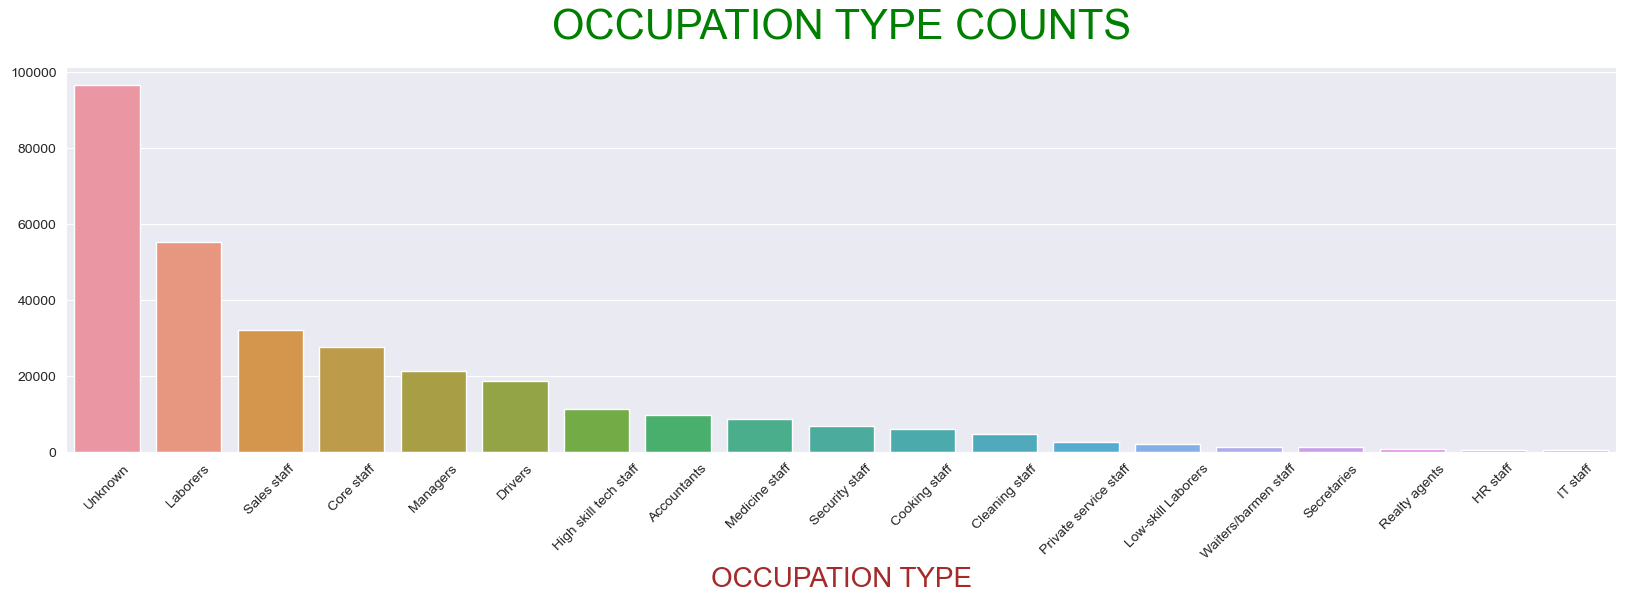

In [962]:
#Value counts un graph
plt.figure(figsize=[20,5])
sns.barplot(x=new_credit.OCCUPATION_TYPE.value_counts().index,
           y=new_credit.OCCUPATION_TYPE.value_counts().values).set_title("OCCUPATION TYPE COUNTS",fontsize=30,color='Green',pad=20)
plt.xlabel("OCCUPATION TYPE",fontsize=20,color='Brown')
plt.xticks(rotation=45)
plt.show()

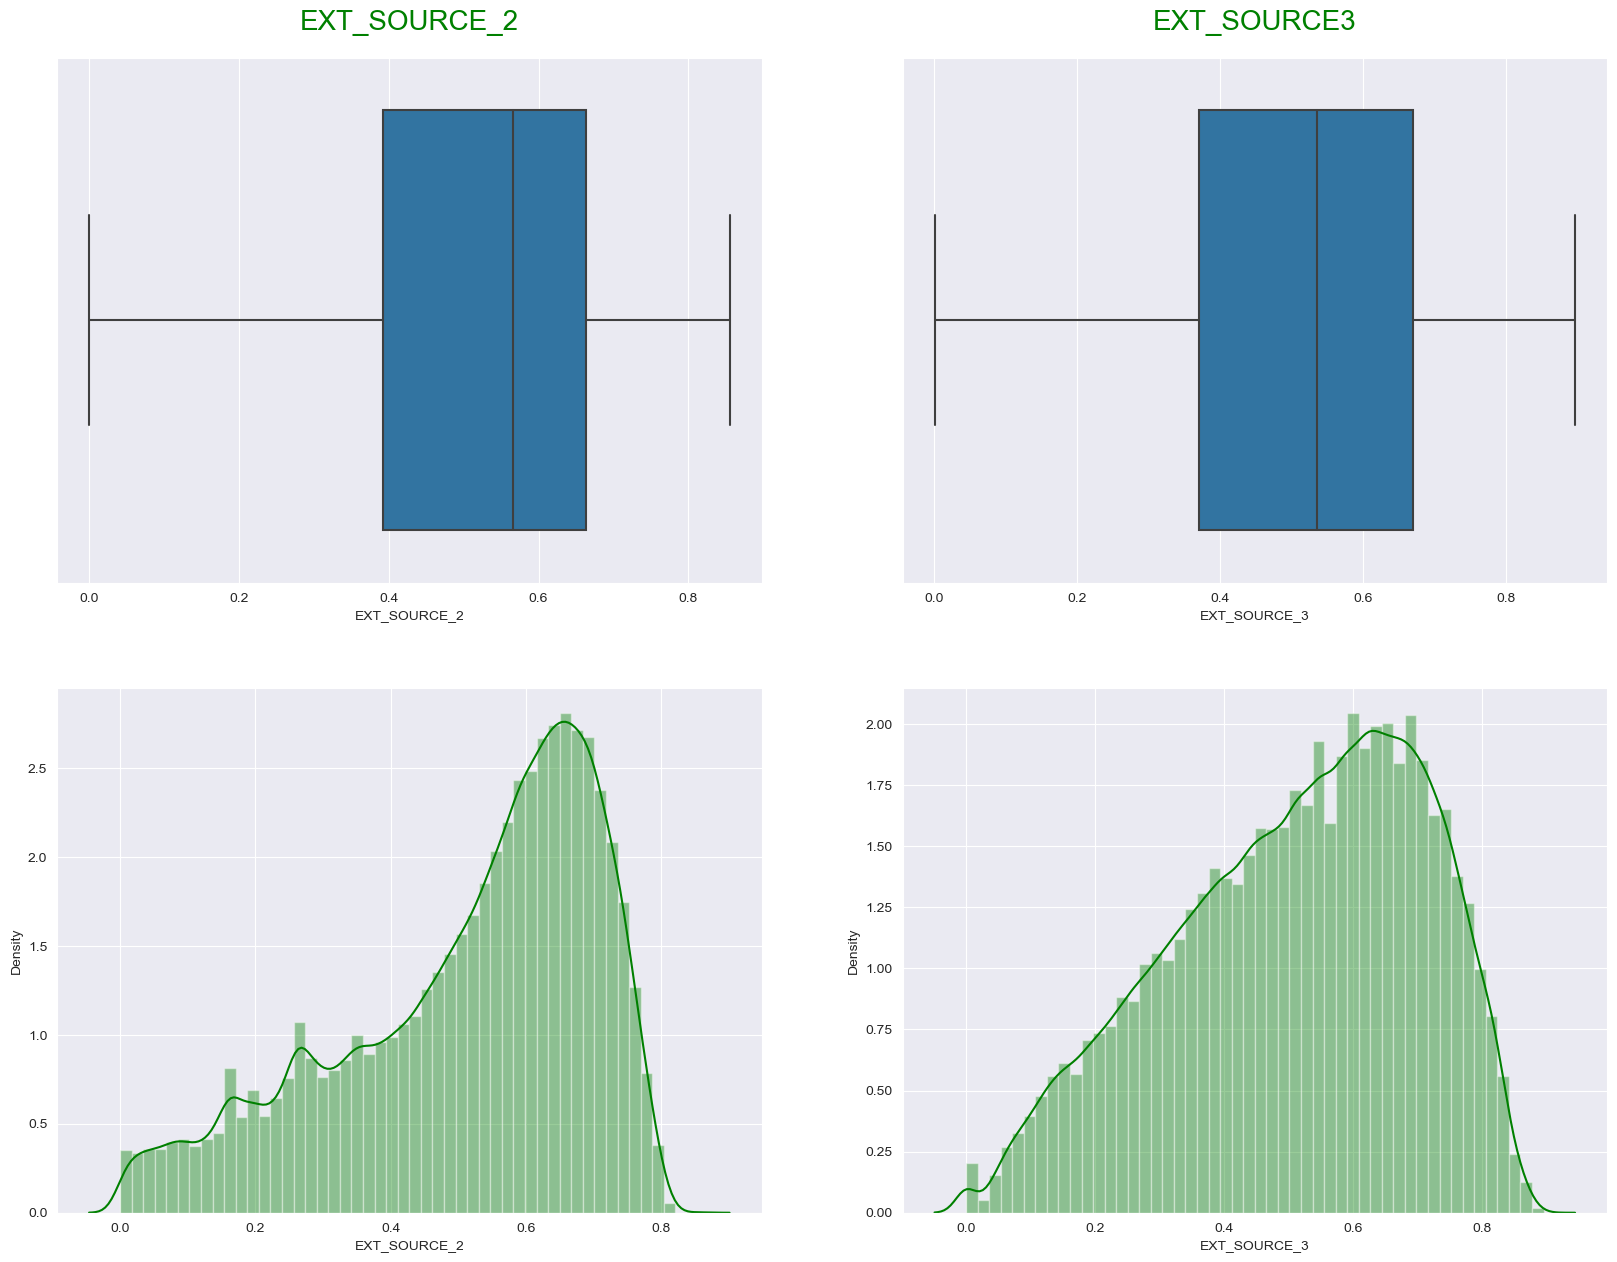

In [963]:
plt.figure(figsize=[20,15])
sns.set_style('darkgrid')
plt.subplot(2,2,1)
sns.boxplot(new_credit['EXT_SOURCE_2']).set_title('EXT_SOURCE_2',fontsize=20,color='Green',pad=20)

plt.subplot(2,2,2)
sns.boxplot(new_credit['EXT_SOURCE_3']).set_title('EXT_SOURCE3',fontsize=20,color='Green',pad=20)

plt.subplot(2,2,3)
sns.distplot(new_credit['EXT_SOURCE_2'],color='g')

plt.subplot(2,2,4)
sns.distplot(new_credit['EXT_SOURCE_3'],color='g')
plt.show()

In [964]:
#There are no outliers .and small amount of skewness
#If the outliers are present if median is like slightly affected as compared to mean
#If there are high salaries then suppose take eg of salary there are people with highest salaries then mean will be shifted towards the positve side

# Median can be used due to skewness

In [965]:
for col in ['EXT_SOURCE_2','EXT_SOURCE_3']:
    new_credit[col].fillna(new_credit[col].median(),inplace=True)

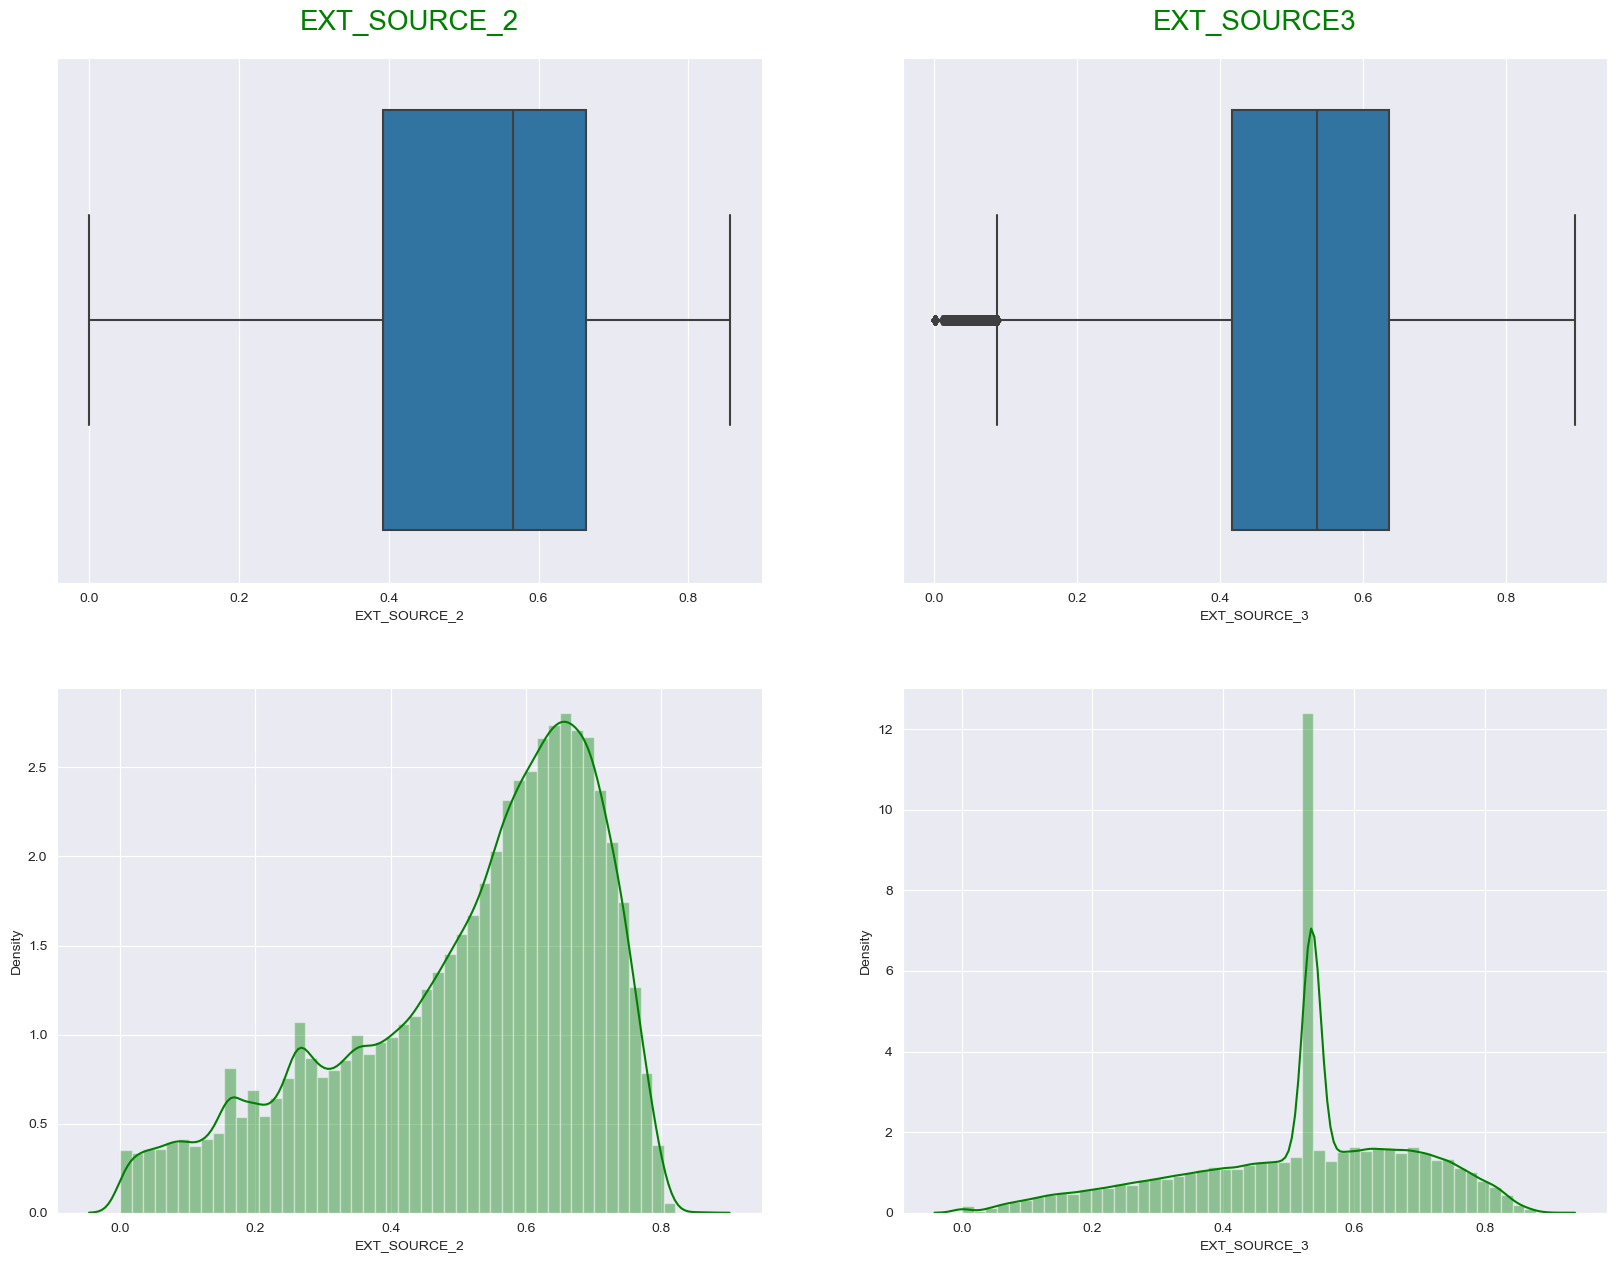

In [966]:
#Checking for amt good_price column
plt.figure(figsize=[20,15])
sns.set_style('darkgrid')
plt.subplot(2,2,1)
sns.boxplot(new_credit['EXT_SOURCE_2']).set_title('EXT_SOURCE_2',fontsize=20,color='Green',pad=20)

plt.subplot(2,2,2)
sns.boxplot(new_credit['EXT_SOURCE_3']).set_title('EXT_SOURCE3',fontsize=20,color='Green',pad=20)

plt.subplot(2,2,3)
sns.distplot(new_credit['EXT_SOURCE_2'],color='g')

plt.subplot(2,2,4)
sns.distplot(new_credit['EXT_SOURCE_3'],color='g')
plt.show()

# Checking and imputing AMT_GOODS_PRICE column

In [967]:
#checking the correlation between the loan amount demnaded vs the good's price

# Checking correlation between the loan amount and price of goods

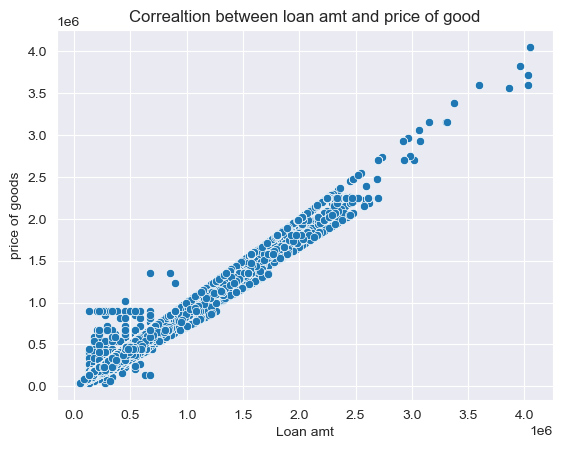

In [968]:
#Checking correlation
sns.scatterplot(x=new_credit['AMT_CREDIT'],y=new_credit['AMT_GOODS_PRICE'],data=new_credit)
plt.title("Correaltion between loan amt and price of good")
plt.xlabel("Loan amt")
plt.ylabel("price of goods")
plt.show()

In [969]:
#We can see almost linear relation
#Loan amt will be equal or less to the goods due to this realtion
#There is high positive correlation between them

In [970]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,2).sort_values(ascending=False)

NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
REG_REGION_NOT_LIVE_REGION     0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
SK_ID_CURR                     0.00
FLAG_WORK_PHONE                0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION    0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.00
EXT_SOURCE_3                   0.00
FLAG_CONT_MOBILE               0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                

In [971]:
#As of now i have treated ext_source 2 ext_source 3

In [972]:
#Now looking at realtion i can replace price of good missing values with the resepective loan amt credited

In [973]:
new_credit['AMT_GOODS_PRICE']=np.where(new_credit['AMT_GOODS_PRICE'].isnull()==True,new_credit['AMT_CREDIT'],new_credit['AMT_GOODS_PRICE'])
#where null equals true take amt credit value other wise return amt good price

In [974]:
new_credit['AMT_GOODS_PRICE'].isnull().sum()

0

In [975]:
#Now we r done with treating goods price also

# Cheking and imputing type suite column

In [976]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [977]:
#Percentage of each category
go.Figure(data=[go.Pie(labels=new_credit.NAME_TYPE_SUITE.value_counts().index,
               values=new_credit.NAME_TYPE_SUITE.value_counts().values,hole=.6,title='Name type suite value counts',pull=[0,0.1,0.1,0.1,0.1,0.1])])

In [978]:
new_credit['NAME_TYPE_SUITE'].isnull().sum()/new_credit.shape[0]*100

0.42014757195677555

In [979]:
new_credit['NAME_TYPE_SUITE'].isnull().sum()

1292

In [980]:
new_credit['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [981]:
#So the no of rows are very less and we have high percentage unaccompanied
#Then it is safe to impute that we can replace the null values with mode of the unaccomapnied

In [982]:
#Replacing
new_credit['NAME_TYPE_SUITE'].fillna(new_credit['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [983]:
new_credit['NAME_TYPE_SUITE'].isnull().sum()

0

In [984]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,4).sort_values(ascending=False)

AMT_ANNUITY                    0.0039
CNT_FAM_MEMBERS                0.0007
DAYS_LAST_PHONE_CHANGE         0.0003
HOUR_APPR_PROCESS_START        0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE                     0.0000
FLAG_EMAIL                     0.0000
OCCUPATION_TYPE                0.0000
REGION_RATING_CLIENT           0.0000
REGION_RATING_CLIENT_W_CITY    0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
REG_REGION_NOT_LIVE_REGION     0.0000
FLAG_EMP_PHONE                 0.0000
REG_REGION_NOT_WORK_REGION     0.0000
LIVE_REGION_NOT_WORK_REGION    0.0000
REG_CITY_NOT_LIVE_CITY         0.0000
REG_CITY_NOT_WORK_CITY         0.0000
LIVE_CITY_NOT_WORK_CITY        0.0000
ORGANIZATION_TYPE              0.0000
EXT_SOURCE_2                   0.0000
EXT_SOURCE_3                   0.0000
FLAG_WORK_PHONE                0.0000
SK_ID_CURR                     0.0000
TARGET                         0.0000
DAYS_ID_PUBLISH                0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER 

In [985]:
#AS VALUES ARE VERY LESS im directly replacing values with median the columns like [CNT_FAM_MEMBERS,'AMT_ANNUITY,DATA_LAST_PHN_NUMBER']
Null_col=['CNT_FAM_MEMBERS','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE']
for i in Null_col:
    new_credit[i].fillna(new_credit[i].median(),inplace=True)

In [986]:
round(new_credit.isnull().sum()/new_credit.shape[0]*100,4).sort_values(ascending=False)

SK_ID_CURR                     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
REG_REGION_NOT_LIVE_REGION     0.0
FLAG_EMP_PHONE                 0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_WORK_PHONE                0.0
FLAG_MOBIL                     0.0
TARGET                         0.0
AMT_GOODS_PRICE                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN        

# All missing values are treated for new_credit

In [987]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [988]:
#Cnt of family memebrs cannot be float since its discrete value
#similary for cnt_fam_memebrs,days_registeration,data_lastphn no

In [989]:
dayandcount=['CNT_FAM_MEMBERS','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']

In [990]:
new_credit.loc[:,dayandcount]=new_credit.loc[:,dayandcount].apply(lambda x:x.astype('int64',errors='ignore'))

In [991]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [992]:
#Listing all obj type columns
objs=list(new_credit.select_dtypes(include='object').columns)


In [993]:
objs

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [994]:
new_credit.loc[:,objs]=new_credit.loc[:,objs].apply(lambda x:x.astype('str'))

In [995]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Checking values of categorical cols
# Checking gender code cols


In [996]:
#value count of gender
new_credit.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

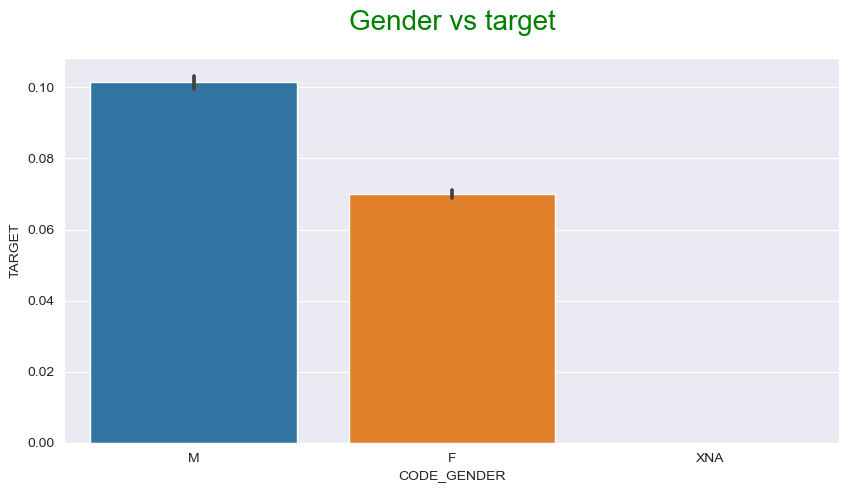

In [997]:
#Checking the gender cols
plt.figure(figsize=[10,5])
sns.barplot(x=new_credit.CODE_GENDER,y=new_credit.TARGET).set_title("Gender vs target",fontsize=20,color='Green',pad=20)
plt.show()

# Checking org type cols


In [998]:
round(new_credit.ORGANIZATION_TYPE.value_counts()/new_credit.shape[0]*100,2)

Business Entity Type 3    22.11
XNA                       18.01
Self-employed             12.49
Other                      5.43
Medicine                   3.64
Business Entity Type 2     3.43
Government                 3.38
School                     2.89
Trade: type 7              2.55
Kindergarten               2.24
Construction               2.19
Business Entity Type 1     1.95
Transport: type 4          1.76
Trade: type 3              1.14
Industry: type 9           1.10
Industry: type 3           1.07
Security                   1.06
Housing                    0.96
Industry: type 11          0.88
Military                   0.86
Bank                       0.82
Agriculture                0.80
Police                     0.76
Transport: type 2          0.72
Postal                     0.70
Security Ministries        0.64
Trade: type 2              0.62
Restaurant                 0.59
Services                   0.51
University                 0.43
Industry: type 7           0.43
Transpor

In [999]:
# Therefore we eliminate sub-cat with overall cat
new_credit.ORGANIZATION_TYPE=new_credit.ORGANIZATION_TYPE.apply(lambda x:'Industry' if 'Industry' in x else x)
new_credit.ORGANIZATION_TYPE=new_credit.ORGANIZATION_TYPE.apply(lambda x:'Trade' if 'Trade' in x else x)
new_credit.ORGANIZATION_TYPE=new_credit.ORGANIZATION_TYPE.apply(lambda x:'Transport' if 'Transport' in x else x)
new_credit.ORGANIZATION_TYPE=new_credit.ORGANIZATION_TYPE.apply(lambda x:'Business' if 'Business' in x else x)

In [1000]:
round(new_credit.ORGANIZATION_TYPE.value_counts()/new_credit.shape[0]*100,2)
#After reducing no of categories from subcat

Business               27.49
XNA                    18.01
Self-employed          12.49
Other                   5.43
Trade                   4.66
Industry                4.65
Medicine                3.64
Government              3.38
Transport               2.92
School                  2.89
Kindergarten            2.24
Construction            2.19
Security                1.06
Housing                 0.96
Military                0.86
Bank                    0.82
Agriculture             0.80
Police                  0.76
Postal                  0.70
Security Ministries     0.64
Restaurant              0.59
Services                0.51
University              0.43
Hotel                   0.31
Electricity             0.31
Insurance               0.19
Telecom                 0.19
Emergency               0.18
Advertising             0.14
Realtor                 0.13
Culture                 0.12
Mobile                  0.10
Legal Services          0.10
Cleaning                0.08
Religion      

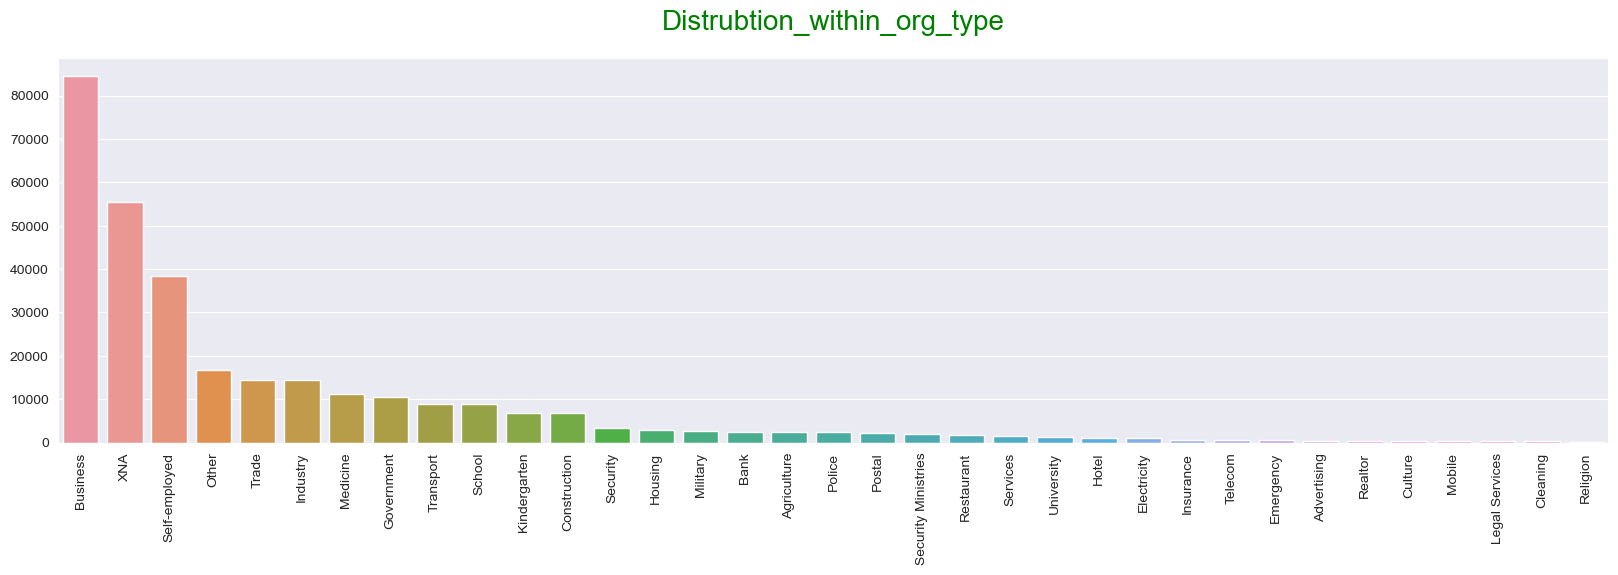

In [1001]:
plt.figure(figsize=[20,5])
sns.barplot(x=new_credit.ORGANIZATION_TYPE.value_counts().index,y=new_credit.ORGANIZATION_TYPE.value_counts().values).set_title('Distrubtion_within_org_type',fontsize=20,color='Green',pad=20)
plt.xticks(rotation=90)
plt.show()

# Inference

#### people who are in buisness field applied more for loan compared to other fields

## Checking Name_Contract_Type column

In [1002]:
new_credit.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

# Checking flag own car column

In [1003]:
new_credit.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

# Checking flag own reality column

In [1004]:
new_credit.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

# Checking name type suite column

In [1005]:
new_credit.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

# Checking Name Education Type column

In [1006]:
new_credit.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

# Checking name family status column

In [1007]:
new_credit.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

# Checking Name Housing Type Column

In [1008]:
new_credit.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

# Checking WEEKDAY_APPR_PROCESS_START_COLUMN

In [1009]:
new_credit.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

# Checking Values of Other Numerical Column(days)

In [1010]:
new_credit.DAYS_BIRTH.unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [1011]:
new_credit.DAYS_EMPLOYED.unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [1012]:
#Checking DAYS REGISTRATION COLUMN

In [1013]:
new_credit.DAYS_REGISTRATION.unique() #Today  - person has born minus stands for eg -3648 days before person has born

array([ -3648,  -1186,  -4260, ..., -16396, -14558, -14798], dtype=int64)

In [1014]:
#Checking Days ID publish Column
new_credit.DAYS_ID_PUBLISH.unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [1015]:
#Checking Days last phn change col

In [1016]:
new_credit.DAYS_LAST_PHONE_CHANGE.unique()

array([-1134,  -828,  -815, ..., -3988, -3899, -3538], dtype=int64)

In [1017]:
#In the days employed we can see there is a value 365243 which corresponds to retired people or people
(new_credit['DAYS_EMPLOYED']//365).value_counts().tail()

-49    4
-47    4
 0     2
-48    1
-50    1
Name: DAYS_EMPLOYED, dtype: int64

In [1018]:
#Changing values to positive
num_days=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for i in num_days:
    new_credit[i]=abs(new_credit[i])

In [1019]:
#Converted -ve values to positive
new_credit.DAYS_LAST_PHONE_CHANGE.unique()

array([1134,  828,  815, ..., 3988, 3899, 3538], dtype=int64)

In [1020]:
for i in ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    print(new_credit[i].unique())
#All vals converted into positive

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648  1186  4260 ... 16396 14558 14798]
[2120  291 2531 ... 6194 5854 6211]
[1134  828  815 ... 3988 3899 3538]


In [1021]:
new_credit.AMT_INCOME_TOTAL.quantile([0,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,0.99,0.999,1])

0.000        25650.0
0.100        81000.0
0.150        90000.0
0.200        99000.0
0.250       112500.0
0.300       112500.0
0.400       135000.0
0.500       147150.0
0.600       162000.0
0.700       180000.0
0.750       202500.0
0.800       225000.0
0.900       270000.0
0.950       337500.0
0.990       472500.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

# Bining(continuous) numerical values for analysis
## Bining of amt_income_total_column-Derived metrics

In [1022]:
new_credit['YEARS_EMPLOYED']= new_credit['DAYS_EMPLOYED']/365
new_credit['Client_Age']= new_credit['DAYS_BIRTH']/365

In [1023]:
new_credit.drop(columns=['DAYS_EMPLOYED','DAYS_BIRTH'],inplace=True)

In [1024]:
new_credit['Age Group']=pd.cut(x=new_credit['Client_Age'],
                       bins=[0,20,30,40,50,60,100],
                       labels=['0-20','20-30','30-40','40-50','50-60','60-100'])

In [1025]:
new_credit[['SK_ID_CURR','Client_Age','Age Group']]

,SK_ID_CURR,Client_Age,Age Group
0,100002,25.920548,20-30
1,100003,45.931507,40-50
2,100004,52.180822,50-60
3,100006,52.068493,50-60
4,100007,54.608219,50-60
...,...,...,...
307506,456251,25.553425,20-30
307507,456252,56.917808,50-60
307508,456253,41.002740,40-50
307509,456254,32.769863,30-40


In [1026]:
new_credit['Work Experience']=pd.cut(
                             x=new_credit['YEARS_EMPLOYED'],
                             bins=[0,5,10,15,20,25,30,100],
                             labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-100']
                             )

In [1027]:
new_credit[['SK_ID_CURR','YEARS_EMPLOYED','Work Experience']]


,SK_ID_CURR,YEARS_EMPLOYED,Work Experience
0,100002,1.745205,0-5
1,100003,3.254795,0-5
2,100004,0.616438,0-5
3,100006,8.326027,5-10
4,100007,8.323288,5-10
...,...,...,...
307506,456251,0.646575,0-5
307507,456252,1000.665753,NaN
307508,456253,21.701370,20-25
307509,456254,13.112329,10-15


In [1028]:
#Previous dataset

In [1029]:
prev_credit.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [1030]:
prev_credit.shape

(1670214, 37)

In [1031]:
prev_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [1032]:
prev_credit.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [1033]:
prev_credit.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [1034]:
prev_credit.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,...,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,...,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,...,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,...,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,...,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,...,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,...,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,...,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


In [1035]:
prev_credit.select_dtypes(include=["int64","float64"]).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [1036]:
len(prev_credit.select_dtypes(include=["int64","float64"]).columns)

21

In [1037]:
prev_credit.count()

SK_ID_PREV                     1670214
SK_ID_CURR                     1670214
NAME_CONTRACT_TYPE             1670214
AMT_ANNUITY                    1297979
AMT_APPLICATION                1670214
AMT_CREDIT                     1670213
AMT_DOWN_PAYMENT                774370
AMT_GOODS_PRICE                1284699
WEEKDAY_APPR_PROCESS_START     1670214
HOUR_APPR_PROCESS_START        1670214
FLAG_LAST_APPL_PER_CONTRACT    1670214
NFLAG_LAST_APPL_IN_DAY         1670214
RATE_DOWN_PAYMENT               774370
RATE_INTEREST_PRIMARY             5951
RATE_INTEREST_PRIVILEGED          5951
NAME_CASH_LOAN_PURPOSE         1670214
NAME_CONTRACT_STATUS           1670214
DAYS_DECISION                  1670214
NAME_PAYMENT_TYPE              1670214
CODE_REJECT_REASON             1670214
NAME_TYPE_SUITE                 849809
NAME_CLIENT_TYPE               1670214
NAME_GOODS_CATEGORY            1670214
NAME_PORTFOLIO                 1670214
NAME_PRODUCT_TYPE              1670214
CHANNEL_TYPE             

In [1038]:
prev_credit.isnull() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670211,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670212,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1039]:
prev_credit.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [1040]:
prev_credit.isnull().values.sum()

11109336

In [1041]:
null_ct1=prev_credit.isnull().sum()
null_percent1=round((null_ct1/prev_credit.shape[0])*100,2)

In [1042]:
null_df1=pd.DataFrame({'col_name':prev_credit.columns,'null_count':null_ct1,'precentage_null_val':null_percent1})
null_df1.reset_index(drop=True,inplace=True)

In [1043]:
null_df1.reset_index(drop=True,inplace=True)

In [1044]:
null_df1.sort_values(by='precentage_null_val',ascending=False)

,col_name,null_count,precentage_null_val
14,RATE_INTEREST_PRIVILEGED,1664263,99.64
13,RATE_INTEREST_PRIMARY,1664263,99.64
12,RATE_DOWN_PAYMENT,895844,53.64
6,AMT_DOWN_PAYMENT,895844,53.64
20,NAME_TYPE_SUITE,820405,49.12
36,NFLAG_INSURED_ON_APPROVAL,673065,40.30
31,DAYS_FIRST_DRAWING,673065,40.30
32,DAYS_FIRST_DUE,673065,40.30
33,DAYS_LAST_DUE_1ST_VERSION,673065,40.30
34,DAYS_LAST_DUE,673065,40.30


In [1045]:
null_df1[null_df1['precentage_null_val']>40].count()  

col_name               11
null_count             11
precentage_null_val    11
dtype: int64

In [1046]:
col_to_delet=null_df1[null_df1['precentage_null_val']>40].col_name.to_list()  

In [1047]:
col_to_delet

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [1048]:
prev_credit.drop(columns=col_to_delet,inplace=True)

In [1049]:
prev_credit.shape

(1670214, 26)

In [1050]:
null_df_less=null_df1[null_df1['precentage_null_val']<40]
null_df_less.sort_values(by='precentage_null_val',ascending=False)

,col_name,null_count,precentage_null_val
7,AMT_GOODS_PRICE,385515,23.08
3,AMT_ANNUITY,372235,22.29
28,CNT_PAYMENT,372230,22.29
30,PRODUCT_COMBINATION,346,0.02
18,NAME_PAYMENT_TYPE,0,0.00
29,NAME_YIELD_GROUP,0,0.00
27,NAME_SELLER_INDUSTRY,0,0.00
26,SELLERPLACE_AREA,0,0.00
25,CHANNEL_TYPE,0,0.00
24,NAME_PRODUCT_TYPE,0,0.00


In [1051]:
prev_credit=prev_credit.replace('XNA', np.NaN)
prev_credit=prev_credit.replace('XAP', np.NaN)

In [1052]:
null_ct1=prev_credit.isnull().sum()
null_percent1=round((null_ct1/prev_credit.shape[0])*100,2)

In [1053]:
null_df1=pd.DataFrame({'col_name':prev_credit.columns,'null_count':null_ct1,'precentage_null_val':null_percent1})
null_df1.reset_index(drop=True,inplace=True)

In [1054]:
null_df1.sort_values(by='precentage_null_val',ascending=False)

,col_name,null_count,precentage_null_val
11,NAME_CASH_LOAN_PURPOSE,1600579,95.83
15,CODE_REJECT_REASON,1358337,81.33
19,NAME_PRODUCT_TYPE,1063666,63.68
17,NAME_GOODS_CATEGORY,950809,56.93
22,NAME_SELLER_INDUSTRY,855720,51.23
14,NAME_PAYMENT_TYPE,627384,37.56
24,NAME_YIELD_GROUP,517215,30.97
6,AMT_GOODS_PRICE,385515,23.08
3,AMT_ANNUITY,372235,22.29
23,CNT_PAYMENT,372230,22.29


In [1055]:
col_to_delet=null_df1[null_df1['precentage_null_val']>40].col_name.to_list()  

In [1056]:
prev_credit.drop(columns=col_to_delet,inplace=True)

In [1057]:
null_df_less=null_df1[null_df1['precentage_null_val']<40]
null_df_less.sort_values(by='precentage_null_val',ascending=False)

,col_name,null_count,precentage_null_val
14,NAME_PAYMENT_TYPE,627384,37.56
24,NAME_YIELD_GROUP,517215,30.97
6,AMT_GOODS_PRICE,385515,23.08
3,AMT_ANNUITY,372235,22.29
23,CNT_PAYMENT,372230,22.29
18,NAME_PORTFOLIO,372230,22.29
16,NAME_CLIENT_TYPE,1941,0.12
25,PRODUCT_COMBINATION,346,0.02
2,NAME_CONTRACT_TYPE,346,0.02
13,DAYS_DECISION,0,0.00


In [1058]:
prev_credit['NAME_PAYMENT_TYPE'].describe()

count                   1042830
unique                        3
top       Cash through the bank
freq                    1033552
Name: NAME_PAYMENT_TYPE, dtype: object

<AxesSubplot:xlabel='count', ylabel='NAME_PAYMENT_TYPE'>

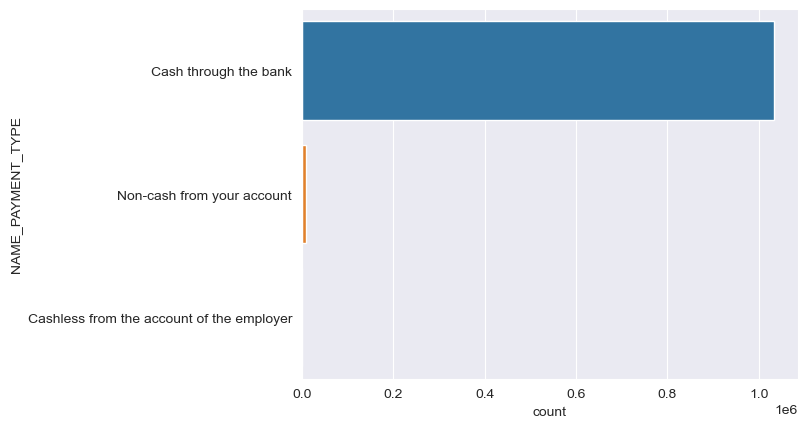

In [1059]:
sb.countplot(y='NAME_PAYMENT_TYPE',data=prev_credit,orient='h')

In [1060]:
prev_credit['NAME_PAYMENT_TYPE'].fillna(value='Cash through the bank',inplace=True)

In [1061]:
prev_credit['NAME_YIELD_GROUP'].describe()

count     1152999
unique          4
top        middle
freq       385532
Name: NAME_YIELD_GROUP, dtype: object

<AxesSubplot:xlabel='NAME_YIELD_GROUP', ylabel='count'>

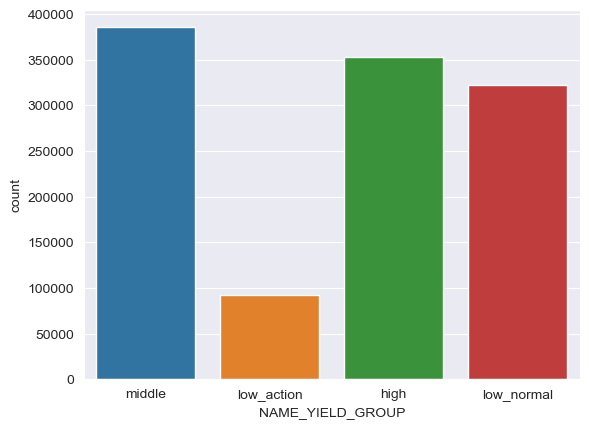

In [1062]:
sb.countplot(x='NAME_YIELD_GROUP', data=prev_credit,orient='v')

In [1063]:
prev_credit['NAME_YIELD_GROUP'].fillna(value='middle',inplace=True)

In [1064]:
prev_credit['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [1065]:
print('median ',prev_credit['AMT_GOODS_PRICE'].median())

median  112320.0


In [1066]:
prev_credit['AMT_GOODS_PRICE'].fillna(value=prev_credit['AMT_GOODS_PRICE'].median(),inplace=True)

In [1067]:
prev_credit['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [1068]:
prev_credit.fillna(prev_credit["AMT_GOODS_PRICE"].median(),inplace=True)

In [1069]:
prev_credit["AMT_ANNUITY"].describe()

count    1.670214e+06
mean     3.743164e+04
std      4.216817e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.544967e+04
75%      5.038650e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [1070]:
prev_credit['AMT_ANNUITY'].fillna(prev_credit['AMT_ANNUITY'].median(),inplace=True)

# ### filling the null value in 'CNT_PAYMENT' column


In [1071]:
prev_credit['CNT_PAYMENT'].describe()

count    1.670214e+06
mean     2.504452e+04
std      4.673728e+04
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      6.000000e+01
max      1.123200e+05
Name: CNT_PAYMENT, dtype: float64

In [1072]:
prev_credit['CNT_PAYMENT'].median()

12.0

In [1073]:
prev_credit['CNT_PAYMENT'].fillna(value=prev_credit['CNT_PAYMENT'].median(),inplace=True)

###  filling the null value in 'NAME_PORTFOLIO' column

In [1074]:
prev_credit['NAME_PORTFOLIO'].describe()

count     1670214
unique          5
top           POS
freq       691011
Name: NAME_PORTFOLIO, dtype: object

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='count'>

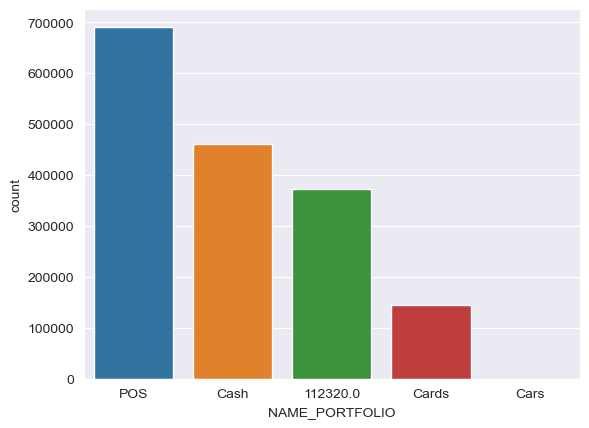

In [1075]:
sb.countplot(x='NAME_PORTFOLIO', data=prev_credit)

In [1076]:
prev_credit['NAME_PORTFOLIO'].fillna(value='POS', inplace=True)

## filling the null value in 'NAME_CLIENT_TYPE' column

In [1077]:
prev_credit['NAME_CLIENT_TYPE'].describe()

count      1670214
unique           4
top       Repeater
freq       1231261
Name: NAME_CLIENT_TYPE, dtype: object

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

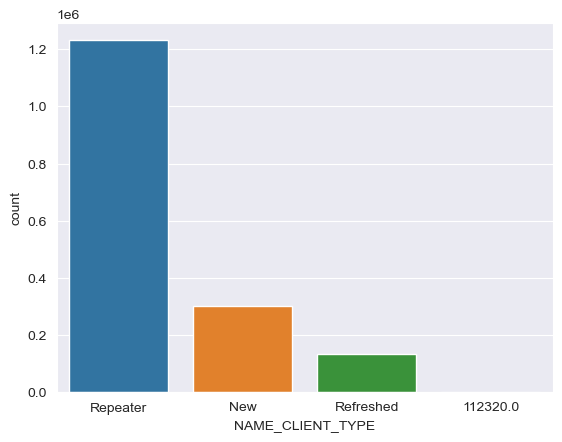

In [1078]:
sb.countplot(x='NAME_CLIENT_TYPE', data=prev_credit)

In [1079]:
prev_credit['NAME_CLIENT_TYPE'].fillna(value='Repeater',inplace=True)

### filling the null value in 'PRODUCT_COMBINATION' column

In [1080]:
prev_credit['PRODUCT_COMBINATION'].describe()

count     1670214
unique         18
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

<AxesSubplot:xlabel='count', ylabel='PRODUCT_COMBINATION'>

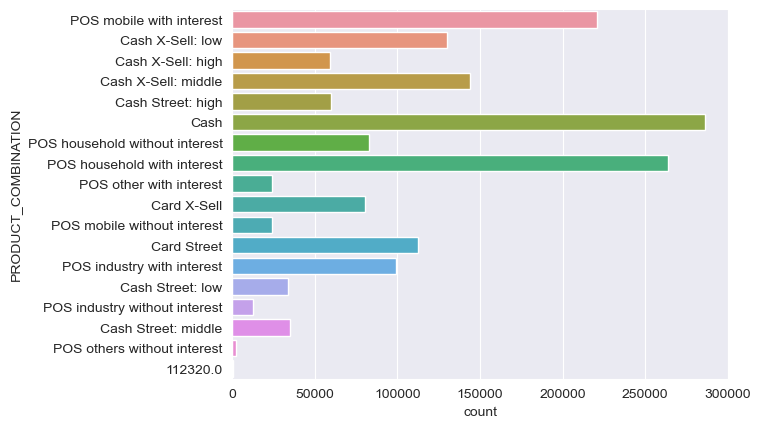

In [1081]:
sb.countplot(y='PRODUCT_COMBINATION', data=prev_credit)

In [1082]:
prev_credit['PRODUCT_COMBINATION'].fillna(value='Cash',inplace=True)

### filling the null values in 'NAME_CONTRACT_TYPE' column

In [1083]:
prev_credit['NAME_CONTRACT_TYPE'].describe()

count        1670214
unique             4
top       Cash loans
freq          747553
Name: NAME_CONTRACT_TYPE, dtype: object

<AxesSubplot:xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

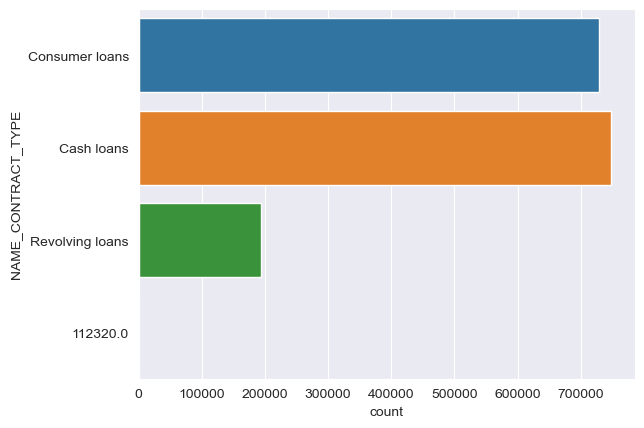

In [1084]:
sb.countplot(y='NAME_CONTRACT_TYPE', data=prev_credit)

In [1085]:
prev_credit['NAME_CONTRACT_TYPE'].fillna(value='Cash loans',inplace=True)

### filling the null value in 'AMT_CREDIT' column

In [1086]:
prev_credit['AMT_CREDIT'].describe()

count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [1087]:
prev_credit['AMT_CREDIT'].median()

80541.0

In [1088]:
prev_credit['AMT_CREDIT'].fillna(value=prev_credit['AMT_CREDIT'].median(), inplace=True)

In [1089]:
prev_credit.isna().sum()*100/prev_credit.shape[0]

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
NAME_CLIENT_TYPE               0.0
NAME_PORTFOLIO                 0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

## we have removed and filled all the null values present in column

In [1090]:
days = []
for i in prev_credit.columns:
    if 'DAYS' in i:
        days.append(i)
        print('Unique Values in {0} column : {1}'.format(i,prev_credit[i].unique()))
        print()

Unique Values in DAYS_DECISION column : [  -73  -164  -301 ... -1967 -2389    -1]



In [1091]:
prev_credit[days]= abs(prev_credit[days])

In [1092]:
prev_credit[days]

,DAYS_DECISION
0,73
1,164
2,301
3,512
4,781
...,...
1670209,544
1670210,1694
1670211,1488
1670212,1185


<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

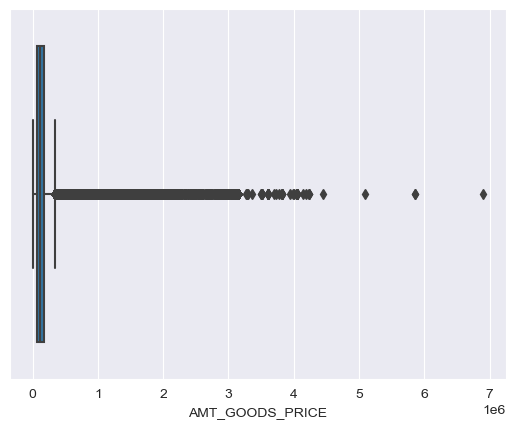

In [1093]:
sb.boxplot(prev_credit.AMT_GOODS_PRICE)

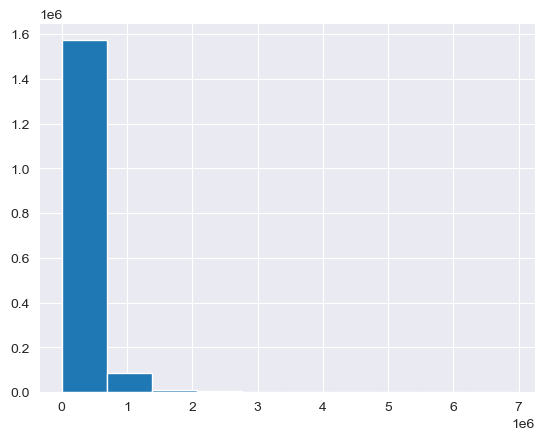

In [1094]:
plt.hist(prev_credit["AMT_GOODS_PRICE"])
plt.show()

In [1095]:
Q1 = prev_credit['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = prev_credit['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

112905.0


In [1096]:
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)
print("Min value before which outlier exist: {}".format(lower))
print("Max value after which outlier exist: {}".format(upper))

Min value before which outlier exist: -101857.5
Max value after which outlier exist: 349762.5


In [1097]:
upper_array = np.where(prev_credit['AMT_GOODS_PRICE']>=upper)[0]
lower_array = np.where(prev_credit['AMT_GOODS_PRICE']<=lower)[0]

In [1098]:
prev_credit.drop(index=upper_array, inplace=True)
prev_credit.drop(index=lower_array, inplace=True)

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

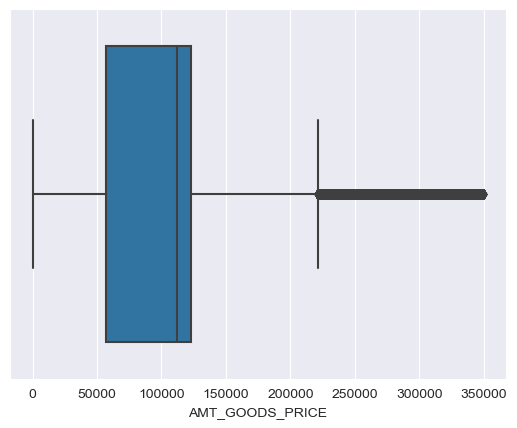

In [1099]:
sb.boxplot(prev_credit.AMT_GOODS_PRICE)

<AxesSubplot:xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

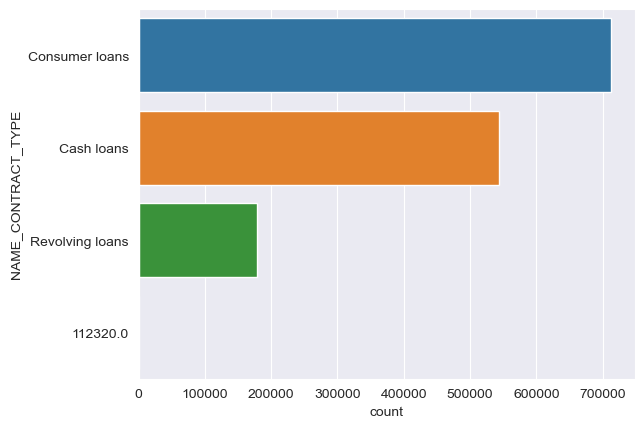

In [1100]:
sb.countplot(y='NAME_CONTRACT_TYPE', data=prev_credit)

In [1101]:
prev_credit['NAME_CONTRACT_TYPE'].fillna(value='Cash loans',inplace=True)

In [1102]:
merged_clean_data = pd.merge(new_credit,prev_credit,how='inner',on='SK_ID_CURR')

In [1103]:
merged_clean_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Approved,606,Cash through the bank,New,POS,Stone,500,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Approved,828,Cash through the bank,Refreshed,POS,Stone,1400,6.0,middle,POS industry with interest
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Approved,2341,Cash through the bank,Refreshed,POS,Country-wide,200,12.0,middle,POS household with interest
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Approved,815,Cash through the bank,New,POS,Regional / Local,30,4.0,middle,POS mobile without interest
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Canceled,181,Cash through the bank,Repeater,112320.0,Credit and cash offices,-1,112320.0,middle,Card Street


In [1104]:
merged_clean_data.select_dtypes(include=["int64","float64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'YEARS_EMPLOYED',
       'Client_Age', 'SK_ID_PREV', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'HOUR_APPR_PROCESS_START_y',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [1105]:
merged_clean_data.select_dtypes(include=["object"]).columns

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [1106]:
len(merged_clean_data.select_dtypes(include=["object"]).columns)

22

In [1107]:
cat_col=merged_clean_data.select_dtypes(include=['object']).columns.tolist()
cat_col

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_x',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [1108]:
dum_col=pd.get_dummies(merged_clean_data[cat_col])

In [1109]:
dum_col

,NAME_CONTRACT_TYPE_x_Cash loans,NAME_CONTRACT_TYPE_x_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215031,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1215032,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1215033,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1215034,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1110]:
data_with_dum2= pd.concat([merged_clean_data,dum_col], axis=1)

In [1111]:
data_with_dum2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,1,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,1,0,0,0,0,0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,1,0,0,0,0,0,0,0
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,1,0,0
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0


# Bivariate Analysis

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

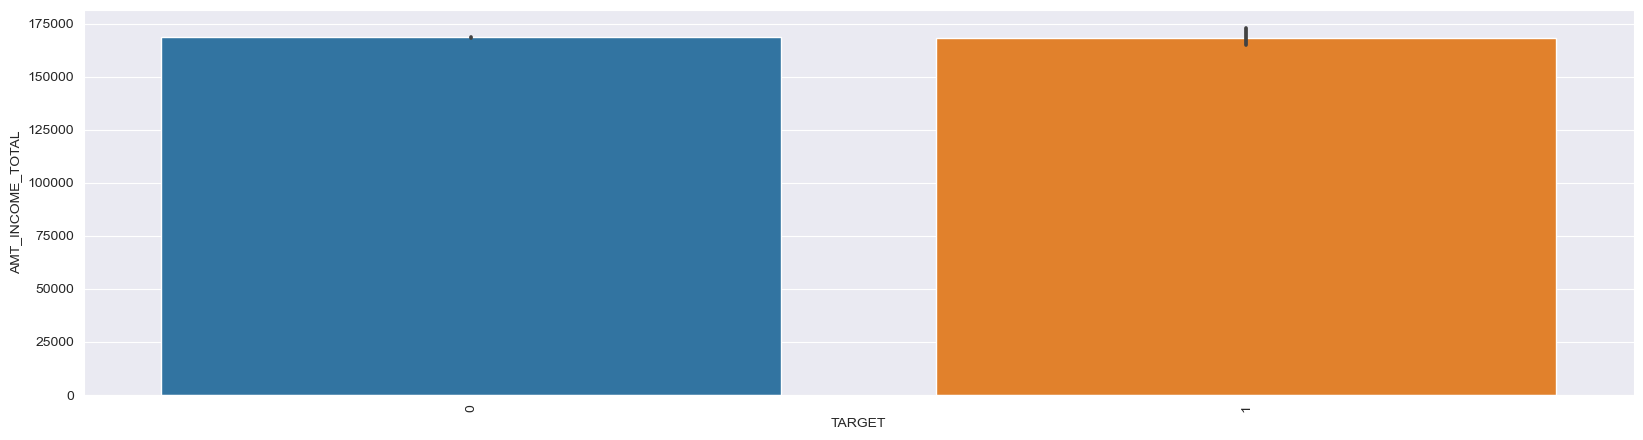

In [1156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sb.barplot(x=data_with_dum2['TARGET'], y=data_with_dum2['AMT_INCOME_TOTAL'])
plt.xticks(rotation='90')

## here as we can see your amount of total income is not influencing much that you will get approval or rejection for the loan 

In [1127]:
import statsmodels
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [1138]:
data_with_dum2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,1,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,1,0,0,0,0,0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,1,0,0,0,0,0,0,0
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,1,0,0
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0


In [1139]:
data_with_dum2= pd.concat([merged_clean_data,dum_col], axis=1)

In [1141]:
data_with_dum2= data_with_dum2.drop(data_with_dum2[cat_col], axis=1)

In [1142]:
x_train,x_test,y_train,y_test=train_test_split(data_with_dum2.drop('TARGET',axis=1),data_with_dum2['TARGET'],test_size=0.25)

In [1147]:
cat=[]
for i in data_with_dum2.columns:
    if isinstance(data_with_dum2[i].dtype,pd.api.types.CategoricalDtype):
        cat.append(i)
cat

['Age Group', 'Work Experience']

In [1148]:
data_with_dum2.drop(data_with_dum2[cat],axis=1,inplace=True)

In [1149]:
x_train,x_test,y_train,y_test=train_test_split(data_with_dum2.drop('TARGET',axis=1),data_with_dum2['TARGET'],test_size=0.25)

In [1150]:
from sklearn.linear_model import LogisticRegression

In [1151]:
reg_mod=LogisticRegression(penalty='l2',C=0.001,n_jobs=-1)

In [1152]:
mod1=reg_mod.fit(x_train,y_train)

In [1155]:
mod1.score(x_train,y_train)

0.913380892966683

In [ ]:
#Score of model 91%

# Conclusions of this loan data analysis:
### Banks should approve loans more for Office apartment, 
### Co-Op apartment housing type as there are less payment difficulties.
### Banks should provide loans to ‘Repairs’ & ‘Others’ purposes.
### Banks should provide loans to the ‘Business Entity Type-3’ and ‘Self-Employed’ persons.
### Working’ people especially female employers are the best to target for the loans.
### As given per problem statement we have created Model which can predict infuture whether we have to give loan or not